# What hotel features are highly correlated?

## Extract data

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import sqlite3

In [2]:
# Connect to the database
conn = sqlite3.connect("Data/Hotels.db")

In [3]:
# Load the metadata2 table
meta = pd.read_sql("select * from metadata2;", conn)

# Load the ratings table
rate = pd.read_sql_query("select * from ratings;", conn)

In [4]:
# Close the connection
conn.close()

In [5]:
# Preview metadata table
meta.head()

,Name,Street,City,province,latitude,longitude,State,Stories,stars,airportDistance_km,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,Rancho Valencia Resort Spa,5921 Valencia Cir,Rancho Santa Fe,CA,32.990959000000004,-117.186136,California,nan,4.0,14.308848055373579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aloft Arundel Mills,7520 Teague Rd,Hanover,MD,39.155929,-76.716341,Maryland,7,4.0,4.668331572785505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hampton Inn Suites PortlandVancouver,315 SE Olympia Dr,Vancouver,WA,45.619212,-122.525196,Washington,4,nan,6.591900084053486,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Hotel Phillips,106 W 12th St,Kansas City,MO,39.100119,-94.584701,Missouri,20,4.0,2.6706451419692976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Inn at Solvang,10611 Standing Stone Rd,Huntingdon,PA,40.527478,-77.969763,Pennsylvania,nan,nan,3.781816947263244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Drop columns from the rate table
rate = rate.drop(columns = ["index", "reviews_userCity", "reviews_userProvince", 
                            "reviews_text", "reviews_title", "reviews_sourceURLs"])

# Change the "name" to "Name"
rate = rate.rename(columns = {"name": "Name"})

# Convert review date from string to datetime format
rate["reviews_date"] = pd.to_datetime(rate["reviews_date"])

# Add a month-year column
rate["year"] = rate["reviews_date"].apply(lambda x: x.strftime("%Y"))

# Preview ratings table
rate.head()

,Name,reviews_date,reviews_rating,year
0,Rancho Valencia Resort Spa,2013-11-14,5.0,2013
1,Rancho Valencia Resort Spa,2014-07-06,5.0,2014
2,Rancho Valencia Resort Spa,2015-01-02,5.0,2015
3,Aloft Arundel Mills,2016-05-15,2.0,2016
4,Aloft Arundel Mills,2016-07-09,5.0,2016


## Transform data
In preparation for correlation analyses

### Merge data frames and remove rows with null values

In [7]:
# Merge the two dataframes
df = pd.merge(rate, meta, on = ["Name"])

# Convert "nan" to np.nan
df.replace("nan", np.nan, inplace = True)

# Remove the rows with null values
df = df.dropna()

# Remove columns that have been converted to dummy variables, not needed in analyses
df = df.drop(columns = ["Name", "Street", "City", "State", 
                        "latitude", "longitude"])
    
# Convert the quantitative variables (including dummy variables) from string to integers
for var in list(df.columns)[4:]:
    df[var] = df[var].astype(float)
    
# Round the review ratings to whole number
rng = list(range(1,2)) + list(range(4, 6)) + list(range(7, len(df.columns)))

for r in rng:
    df.iloc[:, r] = df.iloc[:, r].astype(int)    

# Preview the data frame
df.head()

,reviews_date,reviews_rating,year,province,Stories,stars,airportDistance_km,airport,apartment,attractions,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
3,2016-05-15,2,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-07-09,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2016-06-11,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2016-04-30,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2016-06-24,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Are there trends in frequencies of classes (e.g., ratings, stars, stories)?

In [8]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns

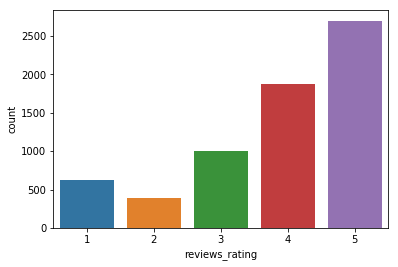

In [9]:
# Create a plot that shows frequencies of the different hotel ratings
sns.countplot(x = df["reviews_rating"].astype(int))

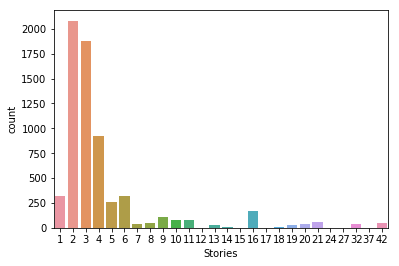

In [10]:
sns.countplot(x = df["Stories"].astype(int))

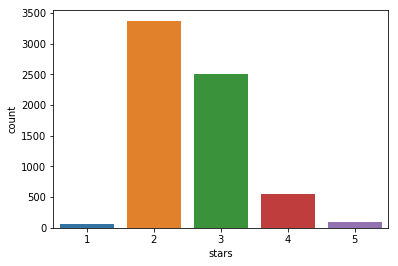

In [11]:
sns.countplot(x = df["stars"].astype(int))

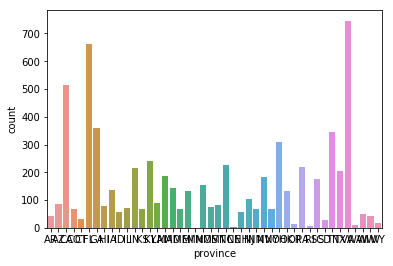

In [12]:
sns.countplot(x = df["province"].sort_values(ascending = True))

In [13]:
df.groupby("province")["province"].count().sort_values(ascending = True)

province
MN      1
NE      4
RI      5
WA      9
OR     14
WY     16
SD     28
CT     32
WV     41
AR     42
WI     50
ID     58
NH     58
KS     68
ME     68
CO     69
NY     69
NM     69
IL     70
MS     76
HI     77
MT     83
AZ     84
LA     90
NJ    103
OK    134
MI    134
IA    135
MD    143
MO    153
SC    175
NV    182
MA    188
TX    205
IN    216
PA    218
NC    226
KY    242
OH    309
TN    346
GA    359
CA    515
FL    662
VA    746
Name: province, dtype: int64

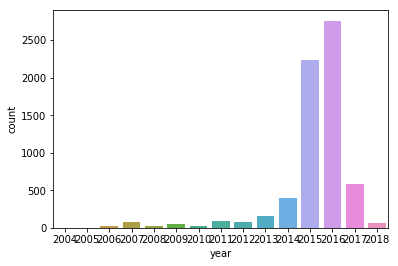

In [14]:
sns.countplot(x = df["year"].sort_values(ascending = True))

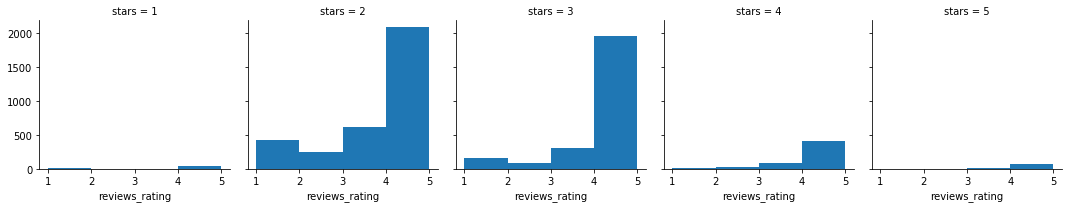

In [15]:
g = sns.FacetGrid(df, col = "stars", margin_titles = True)
bins = [1,2,3,4,5]
g.map(plt.hist, "reviews_rating", bins = bins)

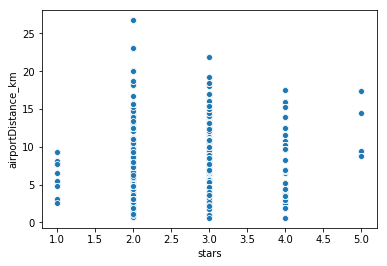

In [16]:
sns.scatterplot(x = df["stars"], y = df["airportDistance_km"])

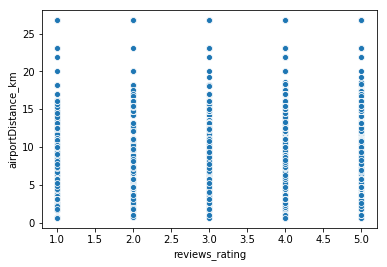

In [17]:
sns.scatterplot(x = df["reviews_rating"], y = df["airportDistance_km"])

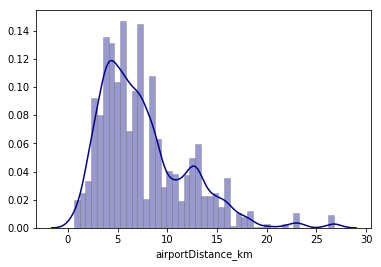

In [18]:
sns.distplot(df["airportDistance_km"], hist = True, kde = True,
            color = "darkblue", hist_kws = {"edgecolor": "grey"})

### Are there categorical variables that are strongly correlated with each other?

In [19]:
df1 = df.drop(columns = ["reviews_date", "year", "province", "airportDistance_km"], axis = 1)
df1.head()

,reviews_rating,Stories,stars,airport,apartment,attractions,bars,beach,boutique,breakfast,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
3,2,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# from sklearn import matthews_corrcoef (calculates phi coefficient)
from sklearn.metrics import matthews_corrcoef

from IPython.core.display import clear_output

var_pairs = [(x, y) for x in df1.columns.values for y in df1.columns.values]

phi_list = []
for f in var_pairs:
    phi = matthews_corrcoef(list(df1[f[0]]), list(df1[f[1]]))
    phi_list.append(phi)    
        
    print(f"Calculating phi coefficients for {f}.")
    print("---")
    clear_output(wait = True)

Calculating phi coefficients for ('WY', 'WY').
---


In [21]:
# Create a dataframe that contains tuples of variable pairs and phi coefficients
df2 = pd.DataFrame({"pair": var_pairs, "phi": phi_list})

# Split the tuples and put each variable in separate columns
df2[["var1", "var2"]] = pd.DataFrame(df2["pair"].tolist())

# Preview the dataframe
df2.head()

,pair,phi,var1,var2
0,"(reviews_rating, reviews_rating)",1.000000,reviews_rating,reviews_rating
1,"(reviews_rating, Stories)",0.007280,reviews_rating,Stories
2,"(reviews_rating, stars)",0.009376,reviews_rating,stars
3,"(reviews_rating, airport)",-0.000973,reviews_rating,airport
4,"(reviews_rating, apartment)",-0.002626,reviews_rating,apartment


In [22]:
# Optional: create a correlation matrix
df3 = df2[["var1", "var2", "phi"]]
df3.pivot(index = "var1", columns = "var2", values = "phi")

var2,AK,AR,AZ,CA,CO,CT,DE,FL,GA,HI,...,restaurant,reviews_rating,services,skiing,spas,stars,theater,utility,village,wedding
var1,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
AR,0.0,1.000000,-0.009125,-0.023385,-0.008261,-0.005610,0.0,-0.026841,-0.019278,-0.008732,...,-0.008261,0.014431,-0.005431,0.0,0.0,-0.000621,0.0,0.0,0.0,-0.001979
AZ,0.0,-0.009125,1.000000,-0.033179,-0.011721,-0.007959,0.0,-0.038082,-0.027351,-0.012389,...,-0.011721,-0.003313,-0.007705,0.0,0.0,-0.000882,0.0,0.0,0.0,-0.002808
CA,0.0,-0.023385,-0.033179,1.000000,-0.030036,-0.020397,0.0,-0.097591,-0.070092,-0.031749,...,0.275489,-0.007379,0.005452,0.0,0.0,-0.002260,0.0,0.0,0.0,-0.007196
CO,0.0,-0.008261,-0.011721,-0.030036,1.000000,-0.007205,0.0,-0.034475,-0.024761,-0.011216,...,0.047976,-0.003133,-0.006975,0.0,0.0,-0.000798,0.0,0.0,0.0,0.239577
CT,0.0,-0.005610,-0.007959,-0.020397,-0.007205,1.000000,0.0,-0.023411,-0.016814,-0.007616,...,-0.007205,0.003621,-0.004737,0.0,0.0,0.025770,0.0,0.0,0.0,-0.001726
DE,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
FL,0.0,-0.026841,-0.038082,-0.097591,-0.034475,-0.023411,0.0,1.000000,-0.080451,-0.036441,...,0.015126,-0.001037,0.067335,0.0,0.0,-0.001189,0.0,0.0,0.0,-0.008259
GA,0.0,-0.019278,-0.027351,-0.070092,-0.024761,-0.016814,0.0,-0.080451,1.000000,-0.026173,...,-0.024761,0.009032,-0.016278,0.0,0.0,0.000617,0.0,0.0,0.0,-0.005932


In [23]:
# What variables to remove from the analyses? 
# Basis: correlation coefficient, r, is higher than 0.69 or lower than -0.69

high = []
for x in range(0, len(df2)):
    if df2["phi"][x] != 1 and df2["phi"][x] >= 0.7 or df2["phi"][x] <= -0.7:
        high.append(df2["pair"][x])
print(high)

[('e-commerce', 'NE'), ('fitness', 'NH'), ('motel', 'reservations'), ('reservations', 'motel'), ('NE', 'e-commerce'), ('NH', 'fitness')]


In [24]:
# Remove a variable that is highly correlated with the other from dataframe df (complete dataframe)
df4 = df.drop(columns = ["NE", "NH", "motel"], axis = 1)
df4.head()

,reviews_date,reviews_rating,year,province,Stories,stars,airportDistance_km,airport,apartment,attractions,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
3,2016-05-15,2,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-07-09,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2016-06-11,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2016-04-30,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2016-06-24,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load the df4 dataframe with new information into a new database table 

In [25]:
# Create a connection to the database
conn = sqlite3.connect("Data/Hotels.db")

# Save the dataframe as a sqlite database table
df4.to_sql("alldata", conn, if_exists = "replace", index = False)

In [26]:
# Preview metadata
pd.read_sql_query("select * from alldata limit 3;", conn)

,reviews_date,reviews_rating,year,province,Stories,stars,airportDistance_km,airport,apartment,attractions,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2016-05-15 00:00:00,2,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-07-09 00:00:00,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-06-11 00:00:00,5,2016,MD,7,4,4.668332,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
conn.close()